# Data Mining

## Similarity Measures

### Euclidean Score

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

![](./../../img/2024-03-25-16-28-24.png)

![](./../../img/2024-03-25-16-28-51.png)

In [2]:
#Function to compute Euclidean Distance. 
def euclidean(v1, v2):
    
    #Convert 1-D Python lists to numpy vectors
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    #Compute vector which is the element wise square of the difference
    diff = np.power(np.array(v1)- np.array(v2), 2)
    
    #Perform summation of the elements of the above vector
    sigma_val = np.sum(diff)
    
    #Compute square root and return final Euclidean score
    euclid_score = np.sqrt(sigma_val)
    
    return euclid_score


In [3]:
#Define 3 users with ratings for 5 movies
u1 = [5,1,2,4,5]
u2 = [1,5,4,2,1]
u3 = [5,2,2,4,4]

In [4]:
euclidean(u1, u2)

7.483314773547883

In [5]:
euclidean(u1, u3)

1.4142135623730951

### Pearson Correlation


![](./../../img/2024-03-25-16-31-47.png)

In [12]:
# In this example, we have two users, Alice and Bob, who have rated 5 items.
# Alice tends to be less generous, not rating anything above 4.
# Bob is more generous, rating everything above 2.

alice = [1,1,3,2,4]
bob = [2,2,4,3,5]

euclidean(alice, bob)

2.23606797749979

In [7]:
eve = [5,5,3,4,2]

# You can see that Eve is the opposite of Alice, rating everything high that Alice rates low, and vice versa. However the euclidean distance 
# Is indicates that they are distant. However it doesnt display anything else aside of that data.
euclidean(eve, alice)


6.324555320336759

In [13]:
from scipy.stats import pearsonr

# Here however shows that there is almost an one to one pearson correlation.

pearsonr(alice, bob)

(1.0, 0.0)

In [14]:
# And here you can see that there is a negative correlation between Alice and Eve.
pearsonr(alice, eve)

(-1.0, 0.0)

## Clustering

### K-Means

**Math for finding the Sum of Squares**

![](./../../img/2024-03-25-16-41-41.png)

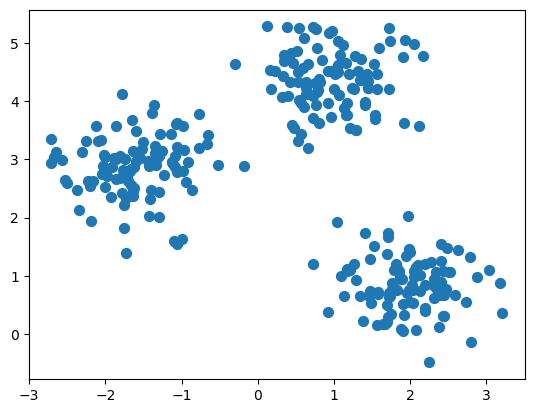

In [15]:
#Import the function that enables us to plot clusters
from sklearn.datasets import make_blobs

#Get points such that they form 3 visually separable clusters
X, y = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.50, random_state=0)


#Plot the points on a scatterplot
plt.scatter(X[:, 0], X[:, 1], s=50)

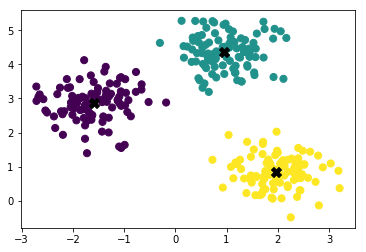

In [ ]:
#Import the K-Means Class
from sklearn.cluster import KMeans

#Initializr the K-Means object. Set number of clusters to 3, 
#centroid initilalization as 'random' and maximum iterations to 10
kmeans = KMeans(n_clusters=3, init='random', max_iter=10)

#Compute the K-Means clustering 
kmeans.fit(X)

#Predict the classes for every point
y_pred = kmeans.predict(X)

#Plot the data points again but with different colors for different classes
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

#Get the list of the final centroids
centroids = kmeans.cluster_centers_

#Plot the centroids onto the same scatterplot.
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')

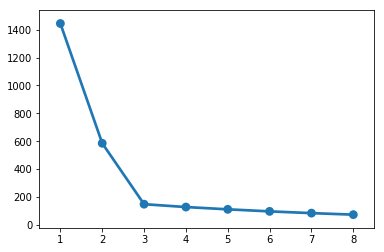

In [ ]:
#List that will hold the sum of square values for different cluster sizes
ss = []

#We will compute SS for cluster sizes between 1 and 8.
for i in range(1,9):
    
    #Initlialize the KMeans object and call the fit method to compute clusters 
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)
    
    #Append the value of SS for a particular iteration into the ss list
    ss.append(kmeans.inertia_)

#Plot the Elbow Plot of SS v/s K
sns.pointplot(x=[j for j in range(1,9)], y=ss)

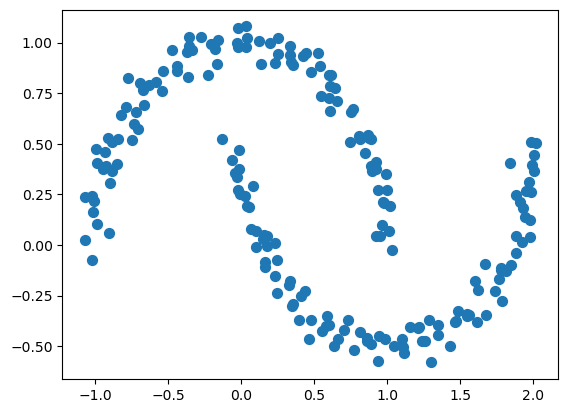

In [16]:
#Import the half moon function from scikit-learn
from sklearn.datasets import make_moons

#Get access to points using the make_moons function
X_m, y_m = make_moons(200, noise=.05, random_state=0)

#Plot the two half moon clusters
plt.scatter(X_m[:, 0], X_m[:, 1], s=50)

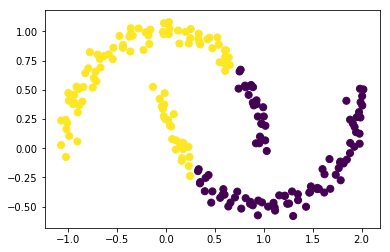

In [ ]:
#Initialize K-Means Object with K=2 (for two half moons) and fit it to our data
kmm = KMeans(n_clusters=2, init='random', max_iter=10)
kmm.fit(X_m)

#Predict the classes for the data points
y_m_pred = kmm.predict(X_m)

#Plot the colored clusters as identified by K-Means
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_pred, s=50)

/usr/local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


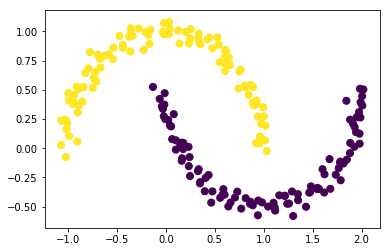

In [ ]:
#Import Spectral Clustering from scikit-learn
from sklearn.cluster import SpectralClustering

#Define the Spectral Clustering Model
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

#Fit and predict the labels
y_m_sc = model.fit_predict(X_m)

#Plot the colored clusters as identified by Spectral Clustering
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s=50);


## Dimensionality Reduction

### Principal Component Analysis

![](./../../img/2024-03-25-16-54-05.png)

In [ ]:
# Load the Iris dataset into Pandas DataFrame
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal_length','sepal_width','petal_length','petal_width','class'])

#Display the head of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Import Standard Scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

#Separate the features and the class
X = iris.drop('class', axis=1)
y = iris['class']

# Scale the features of X
X = pd.DataFrame(StandardScaler().fit_transform(X), 
                 columns = ['sepal_length','sepal_width','petal_length','petal_width'])

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
#Import PCA
from sklearn.decomposition import PCA

#Intialize a PCA object to transform into the 2D Space.
pca = PCA(n_components=2)

#Apply PCA
pca_iris = pca.fit_transform(X)
pca_iris = pd.DataFrame(data = pca_iris, columns = ['PC1', 'PC2'])

pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

In [ ]:
#Concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis = 1)

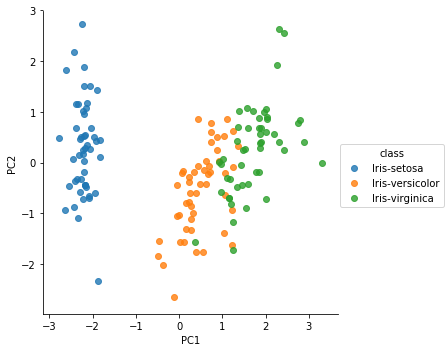

In [ ]:
#Display the scatterplot
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False)

In [ ]:
#Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Define the LDA Object to have two components
lda = LinearDiscriminantAnalysis(n_components = 2)

#Apply LDA
lda_iris = lda.fit_transform(X, y)
lda_iris = pd.DataFrame(data = lda_iris, columns = ['C1', 'C2'])

#Concatenate the class variable
lda_iris = pd.concat([lda_iris, y], axis = 1)

#Display the scatterplot
sns.lmplot(x='C1', y='C2', data=lda_iris, hue='class', fit_reg=False)

,C1,C2
0,8.084953,0.328454
1,7.147163,-0.755473
2,7.511378,-0.238078
3,6.837676,-0.642885
4,8.157814,0.540639


## Supervised Learning

### Gradient Boosting

In [ ]:
#Divide the dataset into the feature dataframe and the target class series.
X, y = iris.drop('class', axis=1), iris['class']

#Split the data into training and test datasets. 
#We will train on 75% of the data and assess our performance on 25% of the data

#Import the splitting funnction
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Apply Gradient Boosting to the training data
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

#Compute the accuracy on the test set
gbc.score(X_test, y_test)

0.97368421052631582

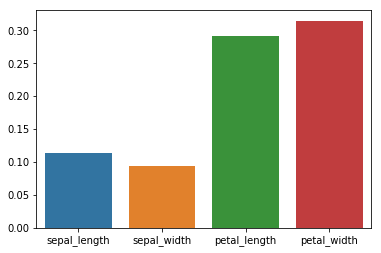

In [ ]:
#Display a bar plot of feature importances
sns.barplot(x= ['sepal_length','sepal_width','petal_length','petal_width'], y=gbc.feature_importances_)